In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# file_path = '/content/drive/MyDrive/Capstone/ML/model rekomendasi/dataset/recipes.csv'
# #menampilkan semua kolom
# pd.set_option('display.max_columns', None)
# df = pd.read_csv(file_path)

In [ ]:
df = pd.read_csv('./dataset/recipes.csv')

In [ ]:
df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""4"", ""1/4"", ""1"", ""1"")","c(""blueberries"", ""granulated sugar"", ""vanilla ...",4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...","c(""saffron"", ""milk"", ""hot green chili peppers""...",3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""46"", ""4"", ""1"", ""2"", ""1"")","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


# data preprocessing

In [ ]:
dataset = df.copy()
dataset.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,RecipeCategory,Keywords,RecipeIngredientQuantities,RecipeIngredientParts,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",Frozen Desserts,"c(""Dessert"", ""Low Protein"", ""Low Cholesterol"",...","c(""4"", ""1/4"", ""1"", ""1"")","c(""blueberries"", ""granulated sugar"", ""vanilla ...",4.5,4.0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",Chicken Breast,"c(""Chicken Thigh & Leg"", ""Chicken"", ""Poultry"",...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...","c(""saffron"", ""milk"", ""hot green chili peppers""...",3.0,1.0,1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",Beverages,"c(""Low Protein"", ""Low Cholesterol"", ""Healthy"",...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",4.5,10.0,311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",Soy/Tofu,"c(""Beans"", ""Vegetable"", ""Low Cholesterol"", ""We...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",4.5,2.0,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",Vegetable,"c(""Low Protein"", ""Vegan"", ""Low Cholesterol"", ""...","c(""46"", ""4"", ""1"", ""2"", ""1"")","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",4.5,11.0,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [ ]:
dataset['RecipeIngredientParts'][0]

'c("blueberries", "granulated sugar", "vanilla yogurt", "lemon juice")'

In [ ]:
dataset['RecipeIngredientQuantities'][0]

'c("4", "1/4", "1", "1")'

In [ ]:
dataset['RecipeInstructions'][0]

'c("Toss 2 cups berries with sugar.", "Let stand for 45 minutes, stirring occasionally.", "Transfer berry-sugar mixture to food processor.", "Add yogurt and process until smooth.", "Strain through fine sieve. Pour into baking pan (or transfer to ice cream maker and process according to manufacturers\' directions). Freeze uncovered until edges are solid but centre is soft.  Transfer to processor and blend until smooth again.", "Return to pan and freeze until edges are solid.", "Transfer to processor and blend until smooth again.", \n"Fold in remaining 2 cups of blueberries.", "Pour into plastic mold and freeze overnight. Let soften slightly to serve.")'

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

jumlah kolom = 28

jumlah baris atau entries = 522.517

tipe object = 14 kolom

tipe numerik = 14 kolom

In [ ]:
dataset.shape

(522517, 28)

In [ ]:
# mengecek data null
dataset.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

kolom yang memiliki nilai null :
- CookTime
- RecipeCategory
- Keywords
- RecipeIngredientQuantities
- AggregatedRating
- ReviewCount
- RecipeServings
- RecipeYield

In [ ]:
# mengecek data yang duplikat
dataset.duplicated().sum()

0

tidak ada nilai yang duplikat

In [ ]:
# hapus nan value pada kolom RecipeServings
dataset = dataset.dropna(subset=['RecipeServings'])
dataset.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       52268
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        4
Images                             1
RecipeCategory                   484
Keywords                       11636
RecipeIngredientQuantities         1
RecipeIngredientParts              0
AggregatedRating              167236
ReviewCount                   163740
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                     0
RecipeYield                   260852
R

In [ ]:
# menghapus baris yang miliki nan value pada kolom RecipeIngredientQuantities
dataset = dataset.dropna(subset=['RecipeIngredientQuantities'])
dataset.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       52267
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        4
Images                             1
RecipeCategory                   484
Keywords                       11636
RecipeIngredientQuantities         0
RecipeIngredientParts              0
AggregatedRating              167236
ReviewCount                   163740
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                     0
RecipeYield                   260851
R

In [ ]:
# menhapus baris yang miliki nilai char 0 pada kolom Images
dataset = dataset[dataset['Images']!='character(0)']
dataset.shape


(109181, 28)

In [ ]:
# memilih kolom yang akan digunakan
kolom = ['Name', 'Images', 'RecipeIngredientParts','RecipeIngredientQuantities',
         'Calories', 'FatContent', 'SaturatedFatContent',
         'CholesterolContent', 'SodiumContent', 'CarbohydrateContent',
         'FiberContent','SugarContent','ProteinContent',
         'RecipeServings', 'RecipeInstructions']
dataset = dataset[kolom]
dataset.head()

,Name,Images,RecipeIngredientParts,RecipeIngredientQuantities,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
0,Low-Fat Berry Blue Frozen Dessert,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""blueberries"", ""granulated sugar"", ""vanilla ...","c(""4"", ""1/4"", ""1"", ""1"")",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,Biryani,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""saffron"", ""milk"", ""hot green chili peppers""...","c(""1"", ""4"", ""2"", ""2"", ""8"", ""1/4"", ""8"", ""1/2"", ...",1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,"c(""Soak saffron in warm milk for 5 minutes and..."
2,Best Lemonade,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...","c(""1 1/2"", ""1"", NA, ""1 1/2"", NA, ""3/4"")",311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,Carina's Tofu-Vegetable Kebabs,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,"c(""Drain the tofu, carefully squeezing out exc..."
4,Cabbage Soup,"""https://img.sndimg.com/food/image/upload/w_55...","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...","c(""46"", ""4"", ""1"", ""2"", ""1"")",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,"c(""Mix everything together and bring to a boil..."


In [ ]:
dataset.describe()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,109181.000000,109181.000000,109181.000000,109181.000000,109181.000000,109181.000000,109181.000000,109181.000000,109181.000000,109181.000000
mean,349.843988,17.593231,6.712341,69.513906,549.077557,32.513137,3.034753,11.953819,15.309129,8.395133
std,427.096960,30.937191,11.427063,113.762995,1613.426283,45.048863,4.688963,26.429105,23.671812,140.676199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,158.400000,5.000000,1.200000,2.900000,113.500000,11.100000,0.800000,2.200000,3.200000,4.000000
50%,277.300000,11.900000,4.000000,38.500000,312.300000,24.700000,1.900000,5.400000,8.200000,6.000000
75%,441.800000,22.700000,8.900000,96.100000,672.300000,42.900000,3.900000,13.800000,23.300000,8.000000
max,41770.200000,4701.100000,992.100000,11823.800000,175987.700000,3564.400000,560.200000,2438.800000,3270.300000,32767.000000


nilai maksimalnya sangat besar, harus dipilih nilai maksimalnya. harus difilter dulu

In [ ]:
# filter data bedasarkan kebutuhan harian nutrisnya

# maksimal kebutuhan harian manusya
max_Calories=2000
max_daily_fat=100
max_daily_Saturatedfat=13
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200
max_list=[max_Calories,max_daily_fat,max_daily_Saturatedfat,max_daily_Cholesterol,max_daily_Sodium,max_daily_Carbohydrate,max_daily_Fiber,max_daily_Sugar,max_daily_Protein]


# kolom yang difilter
kolom_nutrisi = ['Calories', 'FatContent', 'SaturatedFatContent',
         'CholesterolContent', 'SodiumContent', 'CarbohydrateContent',
         'FiberContent','SugarContent','ProteinContent',]
extracted_data=dataset.copy()

#ambil resep yang dibawah kebutuhan harian
for column,maximum in zip(extracted_data[kolom_nutrisi],max_list):
    extracted_data=extracted_data[extracted_data[column]<maximum]

In [ ]:
extracted_data.isnull().sum()

Name                          0
Images                        0
RecipeIngredientParts         0
RecipeIngredientQuantities    0
Calories                      0
FatContent                    0
SaturatedFatContent           0
CholesterolContent            0
SodiumContent                 0
CarbohydrateContent           0
FiberContent                  0
SugarContent                  0
ProteinContent                0
RecipeServings                0
RecipeInstructions            0
dtype: int64

tidak ada data yang null

In [ ]:
((extracted_data.isnull().sum())/len(extracted_data)) * 100

Name                          0.0
Images                        0.0
RecipeIngredientParts         0.0
RecipeIngredientQuantities    0.0
Calories                      0.0
FatContent                    0.0
SaturatedFatContent           0.0
CholesterolContent            0.0
SodiumContent                 0.0
CarbohydrateContent           0.0
FiberContent                  0.0
SugarContent                  0.0
ProteinContent                0.0
RecipeServings                0.0
RecipeInstructions            0.0
dtype: float64

In [ ]:
extracted_data.shape

(87126, 15)

data yang akan digunakan pada model lebih dari 87 ribu data

In [ ]:
# drop data yang kosong
extracted_data = extracted_data.dropna(axis=0)
extracted_data.shape

(87126, 15)

In [ ]:
extracted_data.describe()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,87126.000000,87126.000000,87126.000000,87126.000000,87126.000000,87126.000000,87126.000000,87126.000000,87126.000000,87126.000000
mean,257.667919,11.382135,3.863553,45.391977,393.136308,26.378628,2.788150,8.367727,12.195408,9.092877
std,165.521581,9.675442,3.444742,54.781240,405.737389,21.805111,3.232317,8.898567,13.162958,157.458206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,135.600000,4.000000,1.000000,0.000000,91.725000,10.000000,0.700000,2.000000,2.700000,4.000000
50%,230.400000,9.400000,2.900000,25.600000,261.700000,21.900000,1.800000,5.000000,6.600000,6.000000
75%,349.900000,16.500000,6.100000,71.875000,572.900000,37.300000,3.700000,11.800000,19.000000,8.000000
max,1806.800000,91.200000,12.900000,299.600000,2299.800000,320.100000,38.800000,39.900000,139.300000,32767.000000


ada yang total servingnya sampe 32 ribu, apakah resep untuk hajatan kah????

In [ ]:
dataset_nutrisi = extracted_data[kolom_nutrisi]
dataset_nutrisi.head()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2
3,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3
4,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3
7,228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2
14,62.2,0.1,0.0,1.3,36.6,12.8,0.0,11.8,2.7


In [ ]:
extracted_data.head()

,Name,Images,RecipeIngredientParts,RecipeIngredientQuantities,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
0,Low-Fat Berry Blue Frozen Dessert,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""blueberries"", ""granulated sugar"", ""vanilla ...","c(""4"", ""1/4"", ""1"", ""1"")",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
3,Carina's Tofu-Vegetable Kebabs,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...","c(""12"", ""1"", ""2"", ""1"", ""10"", ""1"", ""3"", ""2"", ""2...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,"c(""Drain the tofu, carefully squeezing out exc..."
4,Cabbage Soup,"""https://img.sndimg.com/food/image/upload/w_55...","c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...","c(""46"", ""4"", ""1"", ""2"", ""1"")",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,"c(""Mix everything together and bring to a boil..."
7,Buttermilk Pie With Gingersnap Crumb Crust,"""https://img.sndimg.com/food/image/upload/w_55...","c(""sugar"", ""margarine"", ""egg"", ""flour"", ""salt""...","c(""3/4"", ""1"", ""1"", ""2"", ""3"", ""1/4"", ""1"", ""1/2""...",228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2,8.0,"c(""Preheat oven to 350°F."", ""Make pie crust, u..."
14,Cafe Cappuccino,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""instant coffee"", ""sugar"", ""nonfat dry milk ...","c(""1/2"", ""3/4"", ""1"", ""1/2"")",62.2,0.1,0.0,1.3,36.6,12.8,0.0,11.8,2.7,18.0,"c(""Stir ingredients together."", ""Process in a ..."


In [ ]:
# extracted_data.to_csv('extracted_data.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# preprocessing data
scaler = MinMaxScaler()
resep_scaled = scaler.fit_transform(dataset_nutrisi)

In [ ]:
dataset_nutrisi.head()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2
3,536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3
4,103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3
7,228.0,7.1,1.7,24.5,281.8,37.5,0.5,24.7,4.2
14,62.2,0.1,0.0,1.3,36.6,12.8,0.0,11.8,2.7


In [ ]:
#save dataset nutrisi
# dataset_nutrisi.to_csv('dataset_nutrisi.csv', index=False)

In [ ]:
# split
train_data, val_data = train_test_split(resep_scaled, test_size = 0.2, random_state = 123)

In [ ]:
train_data

array([[0.23134824, 0.04495614, 0.0620155 , ..., 0.1443299 , 0.32330827,
        0.25484566],
       [0.24584901, 0.25657895, 0.73643411, ..., 0.04639175, 0.05764411,
        0.09906676],
       [0.15104051, 0.15899123, 0.64341085, ..., 0.00773196, 0.01253133,
        0.24910266],
       ...,
       [0.16144565, 0.14254386, 0.49612403, ..., 0.05927835, 0.06766917,
        0.09045226],
       [0.04449856, 0.03289474, 0.04651163, ..., 0.08762887, 0.15288221,
        0.01363963],
       [0.24623644, 0.28508772, 0.65116279, ..., 0.04896907, 0.0802005 ,
        0.09978464]])

In [ ]:
print('train shape : ', train_data.shape)
print('val shape : ',val_data.shape)

train shape :  (69700, 9)
val shape :  (17426, 9)


In [ ]:
input_dim = resep_scaled.shape[1]
input_dim

9

In [ ]:
resep_scaled

array([[0.09458712, 0.02741228, 0.10077519, ..., 0.09278351, 0.75689223,
        0.022972  ],
       [0.29671242, 0.26315789, 0.29457364, ..., 0.44587629, 0.80451128,
        0.2103374 ],
       [0.05733894, 0.00438596, 0.00775194, ..., 0.12371134, 0.44360902,
        0.03086863],
       ...,
       [0.39456498, 0.27850877, 0.66666667, ..., 0.15463918, 0.50626566,
        0.16654702],
       [0.03459154, 0.04824561, 0.21705426, ..., 0.00257732, 0.05764411,
        0.00430725],
       [0.04665707, 0.02302632, 0.09302326, ..., 0.01030928, 0.38596491,
        0.00430725]])

In [55]:
# model
model = Sequential()
# model.add(Dense(64, activation='relu', input_dim=input_dim))
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(input_dim, activation='linear'))

model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(input_dim, activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer=Adam(),
              metrics = ['mae'])

history = model.fit(train_data, train_data,
                    epochs=10,
                    batch_size=32,
                    validation_data = (val_data, val_data))

Epoch 1/10


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2179/2179 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.0045 - mae: 0.0282 - val_loss: 9.6390e-06 - val_mae: 0.0016
Epoch 2/10
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 6.6032e-06 - mae: 0.0015 - val_loss: 7.7498e-05 - val_mae: 0.0074
Epoch 3/10
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 9.5913e-06 - mae: 0.0015 - val_loss: 4.1292e-06 - val_mae: 0.0014
Epoch 4/10
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.9211e-06 - mae: 9.2323e-04 - val_loss: 2.8441e-07 - val_mae: 2.9530e-04
Epoch 5/10
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.2085e-06 - mae: 8.6999e-04 - val_loss: 1.3648e-06 - val_mae: 9.2282e-04
Epoch 6/10
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.5299e-06 - mae: 9.3721e-04 - val_loss: 2.8291e-06 - val_mae: 0.0011
Epoch 7/10
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1.3633e-06 - mae: 7.0487e-04 - val_loss: 8.2317e-07 - val_mae: 6.6113e-04
Epoch 8/10
2179/2179 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 2.7026e-06 - mae: 9.2477e-04

In [56]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 9)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,205 (39.87 KB)

 Trainable params: 3,401 (13.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,804 (26.58 KB)

Text(0, 0.5, 'mae')

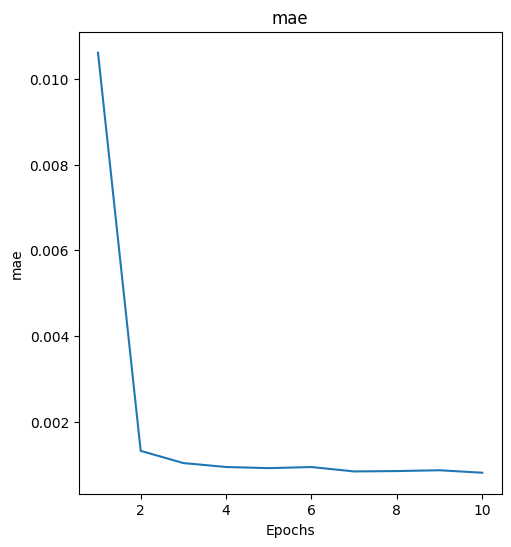

In [ ]:
mae = history.history['mae']

#grafik mae
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(mae) + 1), mae, label='Mae')
dd

')
plt.xlabel('Epochs')
plt.ylabel('mae')



In [57]:
#predict latent feature using the trained model
predicted_latent_feature = model.predict(resep_scaled)

2723/2723 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [58]:
resep_scaled.shape

(87126, 9)

In [59]:
predicted_latent_feature.shape

(87126, 9)

In [60]:
resep_scaled

array([[0.09458712, 0.02741228, 0.10077519, ..., 0.09278351, 0.75689223,
        0.022972  ],
       [0.29671242, 0.26315789, 0.29457364, ..., 0.44587629, 0.80451128,
        0.2103374 ],
       [0.05733894, 0.00438596, 0.00775194, ..., 0.12371134, 0.44360902,
        0.03086863],
       ...,
       [0.39456498, 0.27850877, 0.66666667, ..., 0.15463918, 0.50626566,
        0.16654702],
       [0.03459154, 0.04824561, 0.21705426, ..., 0.00257732, 0.05764411,
        0.00430725],
       [0.04665707, 0.02302632, 0.09302326, ..., 0.01030928, 0.38596491,
        0.00430725]])

In [61]:
predicted_latent_feature

array([[0.09473002, 0.02718716, 0.10003548, ..., 0.09353284, 0.7569328 ,
        0.02330698],
       [0.29714185, 0.2629925 , 0.29360357, ..., 0.44675305, 0.8039491 ,
        0.21110488],
       [0.05779434, 0.0042676 , 0.00683559, ..., 0.12451727, 0.44316185,
        0.03102623],
       ...,
       [0.39463648, 0.2783885 , 0.6661984 , ..., 0.15519682, 0.50689137,
        0.16721703],
       [0.03468556, 0.04810125, 0.2165334 , ..., 0.00310376, 0.05760702,
        0.0045037 ],
       [0.04679541, 0.02286583, 0.09241059, ..., 0.01095891, 0.3859601 ,
        0.00449461]], dtype=float32)

In [62]:
input_nutrisi = np.array([[100, 10, 10, 0, 10, 5, 0, 2, 2]])

input_nutisi_scaled = scaler.transform(input_nutrisi)

similarity = cosine_similarity(input_nutisi_scaled, predicted_latent_feature)

top_resep = np.argsort(similarity, axis=1)[0][::-1][:10]

kolom_pilihan = ['Name', 'Images', 'RecipeIngredientParts',
                 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent',
                 'SodiumContent', 'CarbohydrateContent', 'FiberContent',
                 'SugarContent', 'ProteinContent', 'RecipeServings', 'RecipeInstructions']
recommendations = extracted_data.iloc[top_resep][kolom_pilihan]

recommendations.head(10)

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,Name,Images,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeInstructions
509275,Coconut Crusted Taro Fries,"""https://img.sndimg.com/food/image/upload/w_55...","c(""coconut oil"", ""coconut milk"", ""salt"", ""coco...",100.4,10.8,9.4,0.0,87.1,1.8,0.3,1.0,0.4,2.0,"c(""Preheat the oven to 400&deg;F."", ""Peel the ..."
509607,How to Make Sugar Free Icing for Cookies,"""https://img.sndimg.com/food/image/upload/w_55...","c(""coconut oil"", ""erythritol"", ""turmeric"", ""or...",22.7,2.3,1.9,0.0,0.6,0.8,0.2,0.2,0.1,2.0,"c(""Heat up the coconut oil in a non stick pan...."
304042,"Shake, Smoothie... Frozen Fruit Drink","""https://img.sndimg.com/food/image/upload/w_55...","c(""coconut milk"", ""milk"", ""sugar"")",108.2,10.7,9.2,4.3,20.8,2.7,0.0,0.0,1.9,1.0,"c(""Put coconut milk in blender, add fruit. Pul..."
497636,Green Tea Coconut Milk Ice Cream (Low-GI),"""https://img.sndimg.com/food/image/upload/w_55...","c(""coconut milk"", ""eggs"", ""vanilla extract"", ""...",126.7,13.6,12.1,0.0,8.3,1.8,0.0,0.0,1.3,6.0,"c(""In a blender, place coconut milk, eggs, sug..."
450616,Chocolate Delight - Hcg - P2/P3/P4,"""https://img.sndimg.com/food/image/upload/w_55...","c(""coconut oil"", ""cocoa powder"", ""stevia"")",126.6,14.2,12.1,0.0,0.8,2.3,1.3,0.1,0.8,16.0,"c(""Melt coconut oil (in microwave) for 15-45 s..."
506682,Homemade Fabric Softening Recipe,"""https://img.sndimg.com/food/image/upload/w_55...","c(""coconut oil"", ""white distilled vinegar"")",20.0,1.7,1.5,0.0,0.6,0.0,0.0,0.0,0.0,32.0,"c(""Melt the Emulsifying wax and coconut oil to..."
405835,Raw Vegan Peanut Butter Cups,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""pitted dates"", ""coconut oil"", ""cocoa powder...",83.3,8.1,5.7,0.0,18.4,2.6,0.4,1.9,1.1,12.0,"c(""Combine dates and coconut oil in a small bo..."
221912,Island Affair Cocktail,"""https://img.sndimg.com/food/image/upload/w_55...","c(""Cointreau liqueur"", ""blue curacao"", ""coconu...",71.0,6.6,5.8,0.0,18.5,3.1,0.8,2.3,1.0,1.0,"c(""Pour ingredients one after the other, into ..."
299937,Toasted Coco Colada,"c(""https://img.sndimg.com/food/image/upload/w_...","c(""coconut milk"", ""lime wedge"", ""coconut flakes"")",87.9,7.9,7.0,0.0,27.1,4.6,1.2,2.9,1.3,1.0,"c(""Blend first 5 ingredients in blender until ..."
147042,Coconut White Russian,"""https://img.sndimg.com/food/image/upload/w_55...","c(""brewed coffee"", ""milk"", ""cream of coconut"",...",56.3,4.5,3.7,4.3,25.0,3.0,0.4,1.2,1.6,2.0,"c(""Shake coffee, milk, and cream of coconut; a..."


In [63]:
# save model
model.save('model_rekomendasi_v2.h5')
